In [22]:
# Some modules you might need.
%matplotlib inline
import skimage.io as io
from PIL import Image
import skimage
import os as os
import skimage.filters as filt
import skimage.measure as meas
import skimage.util as util
import numpy as np
import matplotlib.pyplot as plt
import skimage.metrics as metr

In [24]:
def median_filter(kernel,radius):
    reshape_kernel=np.reshape(kernel,[3*radius,radius])
    #repeat the kernel 
    reshape_tile_y=np.tile(reshape_kernel,radius*radius)
    #reshape
    reshape_kernel_x=np.reshape(reshape_kernel,[reshape_kernel.shape[0]*reshape_kernel.shape[1]])
    #TILE
    reshape_tile_x=np.tile(reshape_kernel_x,(radius*radius,1))
    sub_result=(reshape_tile_y-reshape_tile_x)
    
    #sum each row
    sum_result=np.sum(np.abs(sub_result),axis=1)
    #find the min index
    min_result=np.argmin(sum_result)
    #resturn the element 
    final_result=reshape_kernel[min_result]
 

    return final_result

In [25]:
# For every file in the noisy images folder...
for root, dirs, files in os.walk('images/noisy-test'):
    for filename in files:
        
        # construct the full filename
        fname = os.path.join(root, filename)
        #print(fname)
        
        # In case these metadata files show up in the folders, ignore them.
        if filename == '.DS_Store':   
            continue
        
        # Process image noisy file 'fname' here.  The images have the same filenames name in the 
        # noisy, noisy-test, and noiseless folders.  You'll have to construct the path to the
        # noiseless images yourself.  It's easy using os.path.join(), as above.
        
        noisy_img= io.imread(fname)
        #type casting from uint8 into float
        img = skimage.img_as_float(noisy_img)
        
        total_row=img.shape[0]
        total_col=img.shape[1]

        for r in range(total_row):
            for c in range(total_col):
                if r==0 or r==total_row-1 or c==0  or c==total_col-1:
                    continue
                #for 3x3 window or kernel    
                kernel=img[r-1:r+2,c-1:c+2,:]
                img[r][c]=median_filter(kernel,3)
        
        #type casting from float to uint8
        filtered_img=(255*img).astype(np.uint8)
        #convert and save the filtered image in denoised folder
        new=Image.fromarray(filtered_img).convert('RGB')
        new.save('images/denoised/'+filename)       
        

In [26]:
# For every file in the noisy images folder...
psnr_noisy=[]
psnr_filtered=[]
for root, dirs, files in os.walk('images/noisy-test'):
    for filename in files:
        
        # construct the full filename
        fname = os.path.join(root, filename)
        #print(fname)
        
        # In case these metadata files show up in the folders, ignore them.
        if filename == '.DS_Store':   
            continue
            
        #Read all the three types of images    
        noisy_img= io.imread(fname)
        filtered_img=io.imread('images/denoised/'+filename)  
        gnd_truth_img=io.imread('images/noiseless/'+filename)  
                           
        psnr_noisy.append(metr.peak_signal_noise_ratio(gnd_truth_img,noisy_img))  
        psnr_filtered.append(metr.peak_signal_noise_ratio(gnd_truth_img,filtered_img))
   
 

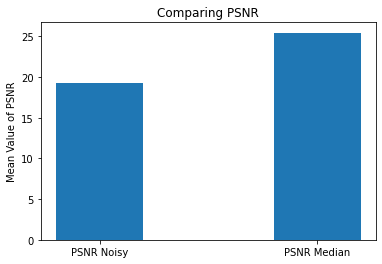

In [27]:
psnr_noisy_mean=np.mean(psnr_noisy)
psnr_filtered_mean=np.mean(psnr_filtered)

psnr_average=[psnr_noisy_mean,psnr_filtered_mean]
psnr_sourse = ('PSNR Noisy', 'PSNR Median')
x_pos=[0.5,2.5]
plt.bar(x_pos, psnr_average)
plt.xticks(x_pos, psnr_sourse)
plt.title('Comparing PSNR')
plt.ylabel('Mean Value of PSNR')
plt.show()

In [28]:
psnr_noisy_mean,psnr_filtered_mean

(19.262592660459585, 25.460188819751256)